<a href="https://colab.research.google.com/github/SheikhMudassarHanif/NLP/blob/main/NLPUrduTextPrepocessing2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 starting phase5

In [1]:
import pandas as pd
import numpy as np
import re
import string



In [2]:
import nltk as nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
dftweets=pd.read_csv('/content/drive/MyDrive/urdu_sarcastic_dataset.csv')
dftweets.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4','Unnamed: 5','Unnamed: 6','Unnamed: 7'],inplace=True)
dftweets.dropna(inplace=True)
dftweets.head()

,urdu_text,is_sarcastic
0,🤣😂😂 ہو لینے دے میری شادی فسادن ٹھیک ہے کوجی نہ...,1.0
1,چل مہمانوں میں کھانا سرو کر چڑیل چاچی نوں دسدی...,1.0
2,کامران خان آپکی دن بھریہ زمہ داری لگائی گئی اپ...,0.0
3,نہیں پائین 😎,0.0
4,`` مراد علی شاہ کے بھیس میں ڈی جی آئی ایس آئی...,1.0


In [4]:
dftweets.tail()

,urdu_text,is_sarcastic
19999,راجہ صاحب نے توڑ سنگ تکر کر چھڈیا۔۔۔ ہن آواز ن...,1.0
20000,اور اس کے بعد بےبی پرائم منسٹر بن گئی۔۔🤣😂🤣🤣😁😁,1.0
20001,اتنا بونگا وزیر اعظم ڈھونڈنے سے بھی نہیں ملے گا 😌,1.0
20002,کاکا جب تم نے عِدت پوری نہیں ہونے دی 🤭 تو عوام...,1.0
20003,جتنا مرضی بلیک میل کر لیں این آر او نہیں دوں گ...,1.0


In [5]:
limit=10000
corpus=dftweets['urdu_text'].head(limit).to_numpy()

In [6]:

def remove_stopWords(whitespaced_tokens, numpy_array):
    # Create a new list to hold tokens after removing stop words
    filtered_tokens = []

    for word in whitespaced_tokens:
        if word not in numpy_array:
            filtered_tokens.append(word)  # Keep the word if it's not a stop word

    return filtered_tokens

In [7]:
# def remove_punctuation(text):
#     return text.translate(str.maketrans('', '', string.punctuation))
def remove_urdu_punctuation(text):
    urdu_punctuation = r"[۔.،؛؟!''\"”“():{}<>[\]|/\\~`@#$%^&*+=-]"
    return re.sub(urdu_punctuation, "", text)

In [8]:
def remove_hashtags(text):

  return re.sub(r'#\w+', '', text)


In [9]:

def remove_url(text):
    return re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

In [10]:
import emoji
def remove_emoji(text):
    emojis = sorted(emoji.EMOJI_DATA, key=len, reverse=True)
    pattern = u'(' + u'|'.join(re.escape(u) for u in emojis) + u')'
    return re.compile(pattern).sub(r'', text)

In [11]:
def Remove_short_convos(text):
  positive_sentiments = ["خوشی", "محبت", "امید", "عزت", "اطمینان", "رحمت", "خواب", "مسرت", "کامیابی", "سکون", "شکریہ", "دوستی", "خوبصورتی", "قوت", "خیرخواہی"]
  negative_sentiments = ["غم", "نفرت", "مایوسی", "شرمندگی", "خوف", "تنہائی", "دکھ", "ناکامی", "پریشانی", "دھمکی", "نفرت", "خطرہ", "بے چینی", "دھوکہ", "غصہ"]
  if any(sentiment in text for sentiment in positive_sentiments) and any(sentiment in text for sentiment in negative_sentiments):
    return True
  else:
    return False


In [12]:
from LughaatNLP import LughaatNLP
urdu_text_processing = LughaatNLP()


In [45]:
def clean_text(text, stopwords_array):
    # Step 1: Remove URLs
    text = remove_url(text)

    # Step 2: Remove Hashtags
    text = remove_hashtags(text)

    #step2.5 : Remove Emjoi
    text=remove_emoji(text)
    #step2.6:normalize
    text=urdu_text_processing.normalize(text)

    # Step 3: Remove Punctuation
    text = remove_urdu_punctuation(text)

    text=urdu_text_processing.remove_stopwords(text)
    # Step 4: Tokenize text
    # whitespaced_tokens = text.split()
    whitespaced_tokens=nltk.word_tokenize(text)

    # Step 5: Remove Stopwords
    filtered_tokens = remove_stopWords(whitespaced_tokens, stopwords_array)

    return ' '.join(filtered_tokens)



data=pd.read_csv('/content/drive/MyDrive/stopwords-list.csv')
df = pd.DataFrame(data)
urdu_stopwords = df.to_numpy()








cleaned_corpus=[]
for doc in corpus:
  words = doc.split()
  if len(words)<=3:
    if Remove_short_convos(doc):
      cleaned_corpus.append(clean_text(doc,urdu_stopwords))

  else:
      cleaned_corpus.append(clean_text(doc,urdu_stopwords))



#cleaned corpus
cleaned_corpus[:10]



['لینے شادی فسادن ٹھیک کوجی',
 'چل مہمانوں کھانا سرو چڑیل چاچی نوں دسدی اں',
 'کامران خان اپکی دن بھریہ زمہ داری لگائی اپوزیشن کردار کشی اوراس پربھونکناہےاپ خوشامدگری وچاپلوسی سےاورکتنی دولت کماناچاہتےہیں موٹرسائیکل سےپیجارو پراڈو کےسفرمیں ضمیرکی لاش سےاٹھتی بدبواپ ناک نوٹ سےالتجاگزارش ہےہمیں فالوکریں',
 'مراد علی شاہ بھیس ڈی ائی ائی حامد میر',
 'قابل اعتبار قاتل اعتبار',
 'انساں تھکا سوچوں سفر',
 'حامد میر ویلڈن',
 'یار وچارہ ویلا ہوندا ہویا تسی تے پکے نجومی منندے',
 'سمجھتے سارا پاکستان بیوقوف ھے',
 'تسی لڑاںٔی کروانی ساڈی']

In [46]:
base_words = {
    # General Nouns
    'کتاب': ['کتاب', 'کتابیں'],                     # Book
    'گھر': ['گھر', 'گھروں'],                         # House
    'بچہ': ['بچہ', 'بچے', 'بچوں'],                   # Child
    'نظام': ['نظام', 'نظاموں'],                     # System
    'دنیا': ['دنیا', 'دنیاوں'],                      # World
    'خواب': ['خواب', 'خوابوں'],                      # Dream
    'دوست': ['دوست', 'دوستوں'],                      # Friend
    'محبت': ['محبت', 'محبتوں'],                      # Love
    'خوشی': ['خوشی', 'خوشیوں'],                      # Happiness
    'دکھ': ['دکھ', 'دکھوں'],                          # Sadness
    'فطرت': ['فطرت', 'فطرتوں'],                      # Nature
    'کام': ['کام', 'کاموں'],                        # Work

    # General Adjectives
    'خوبصورت': ['خوبصورت', 'خوبصورتوں'],          # Beautiful
    'اچھا': ['اچھا', 'اچھی', 'اچھے'],                # Good
    'بڑا': ['بڑا', 'بڑی', 'بڑے'],                    # Big
    'چھوٹا': ['چھوٹا', 'چھوٹی', 'چھوٹے'],           # Small
    'مہنگا': ['مہنگا', 'مہنگی', 'مہنگے'],            # Expensive
    'سستا': ['سستا', 'سستی', 'سستے'],               # Cheap
    'سخت': ['سخت', 'سختی', 'سختیوں'],               # Hard

    # General Verbs
    'پڑھنا': ['پڑھنا', 'پڑھتے', 'پڑھتی', 'پڑھا'],   # To read
    'لکھنا': ['لکھنا', 'لکھتے', 'لکھتی', 'لکھا'],    # To write
    'چلنا': ['چلنا', 'چلتے', 'چلتی', 'چلا'],          # To walk
    'دیکھنا': ['دیکھنا', 'دیکھتے', 'دیکھتی', 'دیکھا'], # To see
    'سنا': ['سنا', 'سنتے', 'سنائی', 'سنایا'],         # To hear
    'سمجھنا': ['سمجھنا', 'سمجھتے', 'سمجھتی', 'سمجھا'], # To understand
    'کھیلنا': ['کھیلنا', 'کھیلتے', 'کھیلتی', 'کھیلا'], # To play
    'کھانا': ['کھانا', 'کھاتے', 'کھاتی', 'کھایا'],     # To eat

    # Political Nouns
    'سیاست': ['سیاست', 'سیاستدان', 'سیاستدانوں'],    # Politics, Politician
    'حکومت': ['حکومت', 'حکومتیں'],                     # Government
    'پارٹی': ['پارٹی', 'پارٹیاں'],                      # Party
    'انتخابات': ['انتخابات', 'انتخابی'],              # Elections
    'حزب': ['حزب', 'احزاب'],                           # Party (political)
    'قومی': ['قومی', 'قومیت'],                         # National
    'مسئلہ': ['مسئلہ', 'مسائل'],                       # Issue
    'بجٹ': ['بجٹ', 'بجٹوں'],                           # Budget
    'مفاہمت': ['مفاہمت', 'مفاہمتیں'],                 # Reconciliation
    'پالیسی': ['پالیسی', 'پالیسیوں'],                 # Policy
    'غیرت': ['غیرت', 'غیرتیں'],                       # Honor
    'دولت': ['دولت', 'دولتیں'],                       # Wealth
    'قانون': ['قانون', 'قوانین'],                     # Law
    'امن': ['امن', 'امنیں'],                          # Peace
    'تنقید': ['تنقید', 'تنقیدیں'],                     # Criticism

    # Sarcastic Expressions
    'واہ': ['واہ', 'واہ واہ'],                       # Wow
    'بہت اچھا': ['بہت اچھا', 'بہت اچھی', 'بہت اچھے'], # Very good (sarcastic)
    'کمال': ['کمال', 'کمالات'],                      # Amazing (sarcastic)
    'عمدہ': ['عمدہ', 'عمدہ کام'],                     # Excellent (sarcastic)
    'کیا بات ہے': ['کیا بات ہے', 'کیا باتیں ہیں'],     # What a thing (sarcastic)
    'زبردست': ['زبردست', 'زبردستی'],                 # Fantastic (sarcastic)
    'مزا آ گیا': ['مزا آ گیا', 'مزا آگیا'],          # That was fun (sarcastic)
    'شکریہ': ['شکریہ', 'شکریہ ادا کرنا'],             # Thank you (can be sarcastic)

    # Political Adjectives
    'سیاسی': ['سیاسی', 'سیاسیوں'],                    # Political
    'مقامی': ['مقامی', 'مقامیوں'],                    # Local
    'علاقائی': ['علاقائی', 'علاقائیوں'],              # Regional
    'مفہومی': ['مفہومی', 'مفہومیوں'],                  # Conceptual
    'مفاہمتی': ['مفاہمتی', 'مفاہمتیوں'],              # Reconciliatory
    'مفید': ['مفید', 'مفیدوں'],                        # Useful
    'نیک': ['نیک', 'نیکوں'],                            # Good/virtuous

    # Political Verbs
    'چننا': ['چننا', 'چنتے', 'چنتی', 'چنا'],            # To elect
    'بیان کرنا': ['بیان کرنا', 'بیان کرتے', 'بیان کرتی'], # To state
    'مذاکرہ کرنا': ['مذاکرہ کرنا', 'مذاکرے کرتے'],    # To negotiate
    'منظور کرنا': ['منظور کرنا', 'منظور کرتے'],       # To approve
    'تحریک کرنا': ['تحریک کرنا', 'تحریک کرتے'],       # To motivate
    'اجلاس کرنا': ['اجلاس کرنا', 'اجلاس کرتے'],       # To convene
    'تنقید کرنا': ['تنقید کرنا', 'تنقید کرتے'],        # To criticize
    'تشکیل دینا': ['تشکیل دینا', 'تشکیل دیتے'],        # To form

    # Other
    'مسلم': ['مسلم', 'مسلمان', 'مسلمانوں'],            # Muslim
    'عوام': ['عوام', 'عوامی'],                          # Public
    'عقیدہ': ['عقیدہ', 'عقائد'],                       # Belief
}

# Example usage



Lemmatization

In [47]:
updated_corpus = []

for sentence in cleaned_corpus:
    updated_sentence = []
    words = sentence.split()  # Split sentence into individual words
    for word in words:
        found_root = False
        for root_word, variants in base_words.items():
            if word in variants:
                updated_sentence.append(root_word)
                found_root = True
                break
        if not found_root:
            updated_sentence.append(word)  # If no root found, keep the original word
    updated_corpus.append(' '.join(updated_sentence))



In [17]:
# !pip install LughaatNLP
from LughaatNLP import LughaatNLP

In [48]:
urdu_text_processing = LughaatNLP()


In [49]:
stemmed_sentence=[]

for sentence in cleaned_corpus:
  stemmed_sentence.append(urdu_text_processing.urdu_stemmer(sentence))


Phase 3 start feature extraction

In [50]:
#tokenization step 1
vocabulary=[]
for sentence in updated_corpus:
  words=sentence.split()
  for word in words:
    if word not in vocabulary:
      vocabulary.append(word)

In [51]:
import numpy as np
from collections import defaultdict

# Step 1: Define the TF function
def compute_tf(corpus):
    tf_values = defaultdict(lambda: defaultdict(float))
    for sentence in corpus:
        words = sentence.split()
        total_words = len(words)
        for word in words:
            tf_values[sentence][word] += 1 / total_words
    return tf_values

# Step 2: Define the IDF function
def compute_idf(vocabulary, corpus):
    total_sentences = len(corpus)
    idf_values = {}

    if total_sentences == 0:
        return idf_values

    for word in vocabulary:
        count = sum(1 for sentence in corpus if word in set(sentence.split()))
        idf_values[word] = np.log(total_sentences / count) if count > 0 else 0

    return idf_values

In [52]:
tf_values = compute_tf(updated_corpus)

# Step 4: Compute IDF values
idf_values = compute_idf(vocabulary, updated_corpus)

# Step 5: Calculate TF-IDF
words_tfidf = defaultdict(lambda: [])
for word in vocabulary:
    for sentence in updated_corpus:
        tf = tf_values[sentence].get(word, 0)
        tf_idf = tf * idf_values[word]  # Calculate the TF-IDF value
        words_tfidf[word].append(tf_idf)

In [53]:
# Iterate through the words_tfidf dictionary
for word, tfidf_scores in words_tfidf.items():
  # Calculate the average TF-IDF score for the word across all sentences
  average_tfidf = sum(tfidf_scores) / len(tfidf_scores) if tfidf_scores else 0
  # Store the word and its average TF-IDF score as a tuple
  words_tfidf[word] = average_tfidf


# Sort the dictionary by TF-IDF scores in descending order
sorted_words_tfidf = dict(sorted(words_tfidf.items(), key=lambda item: item[1], reverse=True))

# Get the top 10 words with their TF-IDF scores
top_10_words = list(sorted_words_tfidf.items())[:10]

# Print the top 10 words and their TF-IDF scores
print("Top 10 words and their TF-IDF scores:")
for word, tfidf_score in top_10_words:
    print(f"{word}: {tfidf_score:.4f}")


Top 10 words and their TF-IDF scores:
_: 0.0553
بات: 0.0361
خان: 0.0278
ھے: 0.0272
سندھ: 0.0268
اچھا: 0.0241
ائی: 0.0224
اللہ: 0.0219
عزت: 0.0215
پاکستان: 0.0207


In [54]:
TFIDF_WORDS=pd.DataFrame(words_tfidf, index=[0]) # Added index=[0]
TFIDF_WORDS.head(10)

,لینے,شادی,فسادن,ٹھیک,کوجی,چل,مہمانوں,کھانا,سرو,چڑیل,...,چھٹکارا,اکتا,᷂شكــٓو,ۦ⇣,صاير,᷂شــٓيہہ˿͢,فاتح,ہیں⁦⁩,فاصلوں,متحرک
0,0.004905,0.005095,0.003943,0.010125,0.002814,0.006712,0.001177,0.006587,0.000859,0.005613,...,0.000044,0.000044,0.000192,0.000192,0.000192,0.000192,0.000087,0.000087,0.00016,0.000056


Now Word2Vec

In [55]:
from gensim.models import Word2Vec

In [56]:
updated_corpus[:20]

['لینے شادی فسادن ٹھیک کوجی',
 'چل مہمانوں کھانا سرو چڑیل چاچی نوں دسدی اں',
 'کامران خان اپکی دن بھریہ زمہ داری لگائی اپوزیشن کردار کشی اوراس پربھونکناہےاپ خوشامدگری وچاپلوسی سےاورکتنی دولت کماناچاہتےہیں موٹرسائیکل سےپیجارو پراڈو کےسفرمیں ضمیرکی لاش سےاٹھتی بدبواپ ناک نوٹ سےالتجاگزارش ہےہمیں فالوکریں',
 'مراد علی شاہ بھیس ڈی ائی ائی حامد میر',
 'قابل اعتبار قاتل اعتبار',
 'انساں تھکا سوچوں سفر',
 'حامد میر ویلڈن',
 'یار وچارہ ویلا ہوندا ہویا تسی تے پکے نجومی منندے',
 'سمجھنا سارا پاکستان بیوقوف ھے',
 'تسی لڑاںٔی کروانی ساڈی',
 'پائن دوبارہ فالو کرئیے',
 'کتنی مہنگائی الو دوسو روپے درجن کدو ۸۰روپے گز ISPR',
 'عشق راس اۓ زخم کھاٶ مسکراٶ',
 'چونا',
 'خاتم _ النبیین _ محمدﷺ Surat ۷۳ سورة المزمل Ayt ۲۰ حصہ۵ ترجمہ اللہ راہ لڑتے جتنا قران میسر پڑھواورنماز قائم رکھواورزکوٰة دواور اللہ اچھا قرض درود _ وقران صلی اللہ علٰی حبیبہٖ سیدنا محمد والہٖ وصحبہٖ وسلم',
 'بیچارے بیویاں ہیے تیسری ٹرائ',
 'پتہ ہورہا بورڈ زنگ',
 'اللہ رحمتوں سائے مکمل صحت یاب فرمائے',
 'ارمی چیف نوٹس مجرم جرائیم نوٹس کرےگا',

In [57]:
tokenized_corpus = [sentence.split() for sentence in updated_corpus]

# Step 2: Train Word2Vec model using the tokenized corpus
from gensim.models import Word2Vec

model = Word2Vec(sentences=tokenized_corpus, vector_size=100, window=5, min_count=1, workers=4)

# Save the model
model.save("urdu_word2vec.model")

In [58]:
similar_words = model.wv.most_similar("اچھا")
print(similar_words)

[('پاکستان', 0.9996330142021179), ('بات', 0.9996100068092346), ('لوگ', 0.9995627999305725), ('دنیا', 0.9994827508926392), ('محبت', 0.9993654489517212), ('ختم', 0.9993335604667664), ('چیز', 0.9992939233779907), ('ضرورت', 0.9992095828056335), ('چور', 0.9991340041160583), ('منہ', 0.999121904373169)]


GRams

In [109]:
#creating Bigrams vectors /embeddings from the urdu dataset

In [59]:

bigrams = [" ".join(pair) for pair in zip(vocabulary, vocabulary[1:])]
print('bigrams')
print(bigrams)


bigrams
['لینے شادی', 'شادی فسادن', 'فسادن ٹھیک', 'ٹھیک کوجی', 'کوجی چل', 'چل مہمانوں', 'مہمانوں کھانا', 'کھانا سرو', 'سرو چڑیل', 'چڑیل چاچی', 'چاچی نوں', 'نوں دسدی', 'دسدی اں', 'اں کامران', 'کامران خان', 'خان اپکی', 'اپکی دن', 'دن بھریہ', 'بھریہ زمہ', 'زمہ داری', 'داری لگائی', 'لگائی اپوزیشن', 'اپوزیشن کردار', 'کردار کشی', 'کشی اوراس', 'اوراس پربھونکناہےاپ', 'پربھونکناہےاپ خوشامدگری', 'خوشامدگری وچاپلوسی', 'وچاپلوسی سےاورکتنی', 'سےاورکتنی دولت', 'دولت کماناچاہتےہیں', 'کماناچاہتےہیں موٹرسائیکل', 'موٹرسائیکل سےپیجارو', 'سےپیجارو پراڈو', 'پراڈو کےسفرمیں', 'کےسفرمیں ضمیرکی', 'ضمیرکی لاش', 'لاش سےاٹھتی', 'سےاٹھتی بدبواپ', 'بدبواپ ناک', 'ناک نوٹ', 'نوٹ سےالتجاگزارش', 'سےالتجاگزارش ہےہمیں', 'ہےہمیں فالوکریں', 'فالوکریں مراد', 'مراد علی', 'علی شاہ', 'شاہ بھیس', 'بھیس ڈی', 'ڈی ائی', 'ائی حامد', 'حامد میر', 'میر قابل', 'قابل اعتبار', 'اعتبار قاتل', 'قاتل انساں', 'انساں تھکا', 'تھکا سوچوں', 'سوچوں سفر', 'سفر ویلڈن', 'ویلڈن یار', 'یار وچارہ', 'وچارہ ویلا', 'ویلا ہوندا', 'ہوندا ہویا', 'ہویا تسی', 

In [60]:
trigrams = [" ".join(trio) for trio in zip(vocabulary, vocabulary[1:], vocabulary[2:])]
print('trigrams')
print(trigrams)

trigrams
['لینے شادی فسادن', 'شادی فسادن ٹھیک', 'فسادن ٹھیک کوجی', 'ٹھیک کوجی چل', 'کوجی چل مہمانوں', 'چل مہمانوں کھانا', 'مہمانوں کھانا سرو', 'کھانا سرو چڑیل', 'سرو چڑیل چاچی', 'چڑیل چاچی نوں', 'چاچی نوں دسدی', 'نوں دسدی اں', 'دسدی اں کامران', 'اں کامران خان', 'کامران خان اپکی', 'خان اپکی دن', 'اپکی دن بھریہ', 'دن بھریہ زمہ', 'بھریہ زمہ داری', 'زمہ داری لگائی', 'داری لگائی اپوزیشن', 'لگائی اپوزیشن کردار', 'اپوزیشن کردار کشی', 'کردار کشی اوراس', 'کشی اوراس پربھونکناہےاپ', 'اوراس پربھونکناہےاپ خوشامدگری', 'پربھونکناہےاپ خوشامدگری وچاپلوسی', 'خوشامدگری وچاپلوسی سےاورکتنی', 'وچاپلوسی سےاورکتنی دولت', 'سےاورکتنی دولت کماناچاہتےہیں', 'دولت کماناچاہتےہیں موٹرسائیکل', 'کماناچاہتےہیں موٹرسائیکل سےپیجارو', 'موٹرسائیکل سےپیجارو پراڈو', 'سےپیجارو پراڈو کےسفرمیں', 'پراڈو کےسفرمیں ضمیرکی', 'کےسفرمیں ضمیرکی لاش', 'ضمیرکی لاش سےاٹھتی', 'لاش سےاٹھتی بدبواپ', 'سےاٹھتی بدبواپ ناک', 'بدبواپ ناک نوٹ', 'ناک نوٹ سےالتجاگزارش', 'نوٹ سےالتجاگزارش ہےہمیں', 'سےالتجاگزارش ہےہمیں فالوکریں', 'ہےہمیں فالوکریں مراد'

In [61]:
unigrams=vocabulary
print('unigrams')
print(unigrams)

unigrams
['لینے', 'شادی', 'فسادن', 'ٹھیک', 'کوجی', 'چل', 'مہمانوں', 'کھانا', 'سرو', 'چڑیل', 'چاچی', 'نوں', 'دسدی', 'اں', 'کامران', 'خان', 'اپکی', 'دن', 'بھریہ', 'زمہ', 'داری', 'لگائی', 'اپوزیشن', 'کردار', 'کشی', 'اوراس', 'پربھونکناہےاپ', 'خوشامدگری', 'وچاپلوسی', 'سےاورکتنی', 'دولت', 'کماناچاہتےہیں', 'موٹرسائیکل', 'سےپیجارو', 'پراڈو', 'کےسفرمیں', 'ضمیرکی', 'لاش', 'سےاٹھتی', 'بدبواپ', 'ناک', 'نوٹ', 'سےالتجاگزارش', 'ہےہمیں', 'فالوکریں', 'مراد', 'علی', 'شاہ', 'بھیس', 'ڈی', 'ائی', 'حامد', 'میر', 'قابل', 'اعتبار', 'قاتل', 'انساں', 'تھکا', 'سوچوں', 'سفر', 'ویلڈن', 'یار', 'وچارہ', 'ویلا', 'ہوندا', 'ہویا', 'تسی', 'تے', 'پکے', 'نجومی', 'منندے', 'سمجھنا', 'سارا', 'پاکستان', 'بیوقوف', 'ھے', 'لڑاںٔی', 'کروانی', 'ساڈی', 'پائن', 'دوبارہ', 'فالو', 'کرئیے', 'کتنی', 'مہنگائی', 'الو', 'دوسو', 'روپے', 'درجن', 'کدو', '۸۰روپے', 'گز', 'ISPR', 'عشق', 'راس', 'اۓ', 'زخم', 'کھاٶ', 'مسکراٶ', 'چونا', 'خاتم', '_', 'النبیین', 'محمدﷺ', 'Surat', '۷۳', 'سورة', 'المزمل', 'Ayt', '۲۰', 'حصہ۵', 'ترجمہ', 'اللہ', 'راہ', 'لڑت

Generating embedding from n-grams

In [37]:
#calculating word frequency using Bigram

In [62]:
def count_bigram_frequency(vocabulary, corpus):
    # Initialize a dictionary to store the frequencies
    bigram_freq = defaultdict(int)

    # Join all the sentences in the corpus into a single string
    full_text = ' '.join(corpus)

    # Loop through each bigram in the vocabulary and count its frequency
    for bigram in vocabulary:
        bigram_freq[bigram] = full_text.count(bigram)

    return bigram_freq

# Get the bigram frequency
bigram_frequency_dict = count_bigram_frequency(bigrams, updated_corpus)



top_10_bigrams = sorted(bigram_frequency_dict.items(), key=lambda x: x[1], reverse=True)[:10]

# Print the top 10 most common bigrams
print("Top 10 most common bigrams:")
for bigram, freq in top_10_bigrams:
    print(f"{bigram}: {freq}")

Top 10 most common bigrams:
سندھ پولیس: 141
ارمی چیف: 124
مریم نواز: 83
کامران خان: 70
حامد میر: 49
نون لیگ: 34
پیپلز پارٹی: 33
روپے درجن: 31
علی شاہ: 30
پریس کانفرنس: 29


In [63]:
def count_trigram_frequency(vocabulary, corpus):
    # Initialize a dictionary to store the frequencies
    trigram_freq = defaultdict(int)

    # Join all the sentences in the corpus into a single string
    full_text = ' '.join(corpus)

    # Loop through each bigram in the vocabulary and count its frequency
    for trigram in vocabulary:
        trigram_freq[trigram] = full_text.count(trigram)

    return trigram_freq

# Get the bigram frequency
trigram_frequency_dict = count_trigram_frequency(trigrams, updated_corpus)

top_10_trigrams = sorted(trigram_frequency_dict.items(), key=lambda x: x[1], reverse=True)[:10]

# Print the top 10 most common bigrams
print("Top 10 most common trigrams:")
for trigram, freq in top_10_trigrams:
    print(f"{trigram}: {freq}")

Top 10 most common trigrams:
مراد علی شاہ: 26
خاتم _ النبیین: 17
چینی ۱۰۰ روپےمربع: 17
۱۰۰ روپےمربع فٹ: 17
روپےمربع فٹ سونا۱لاکھ: 17
᷂استغفر ᷂اللهہ ᷂واتوب: 17
᷂اللهہ ᷂واتوب ᷂اليهہ: 17
᷂واتوب ᷂اليهہ ┊❥: 17
فٹ سونا۱لاکھ روپےکلومیڑ: 15
الو۲۰۰روپےدرجن انڈے۲۰۰کلو اٹا۶۰۰روپےلیٹر: 13


In [64]:
def count_unigrams_frequency(vocabulary, corpus):
    # Initialize a dictionary to store the frequencies
    unigrams_freq = defaultdict(int)

    # Join all the sentences in the corpus into a single string
    full_text = ' '.join(corpus)

    # Loop through each bigram in the vocabulary and count its frequency
    for unigrams in vocabulary:
        unigrams_freq[unigrams] = full_text.count(unigrams)

    return unigrams_freq

# Get the bigram frequency
unigrams_frequency_dict = count_unigrams_frequency(unigrams, updated_corpus)

top_10_unigrams = sorted(unigrams_frequency_dict.items(), key=lambda x: x[1], reverse=True)[:10]

# Print the top 10 most common bigrams
print("Top 10 most common unigrams:")
for unigrams, freq in top_10_unigrams:
    print(f"{unigrams}: {freq}")

Top 10 most common unigrams:
ا: 50220
ی: 31675
ن: 22467
ل: 18299
ب: 11979
د: 11009
س: 10599
ہ: 10241
ھ: 9395
ے: 8971


## **PHASE** **5**

In [65]:
dftweets.head()
labels=dftweets['is_sarcastic']
labels=labels.to_numpy()

In [67]:
import numpy as np
from sklearn.model_selection import train_test_split

# Step 1: Convert words_tfidf into feature vectors for each sentence
X = []
for sentence in updated_corpus:
    sentence_vector = []
    for word in vocabulary:
        tfidf_value = tf_values[sentence].get(word, 0) * idf_values[word]
        sentence_vector.append(tfidf_value)
    X.append(sentence_vector)

# Step 2: Convert to NumPy array for model input
X = np.array(X)

# Ensure that 'labels' has the same length as updated_corpus
# Make sure that labels correspond to the correct sentences in updated_corpus
labels = labels[:len(updated_corpus)]  # Adjust this based on how 'labels' should be aligned with 'updated_corpus'

# Assuming you have labeled data for sentiment
y = np.array(labels)  # `labels` should contain the sentiment labels for each sentence

# Print the shapes of X and y to verify consistency
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

# Step 3: Split the data into training and test sets (only if X and y have the same number of samples)
if X.shape[0] == y.shape[0]:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
else:
    print("Error: X and y have different numbers of samples. Cannot perform train_test_split.")

Shape of X: (9557, 15776)
Shape of y: (9557,)


In [68]:
from sklearn.linear_model import LogisticRegression

# Step 4: Train a logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [69]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Step 5: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 6: Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")


Accuracy: 0.4989539748953975
Precision: 0.49948541706933774
Recall: 0.4989539748953975
F1-Score: 0.49904279583095834


In [71]:
# Step 1: Define a function to preprocess and convert input text to TF-IDF vector
def text_to_tfidf_vector(input_text, tf_values, idf_values, vocabulary):
    # Tokenize the input text (split into words)
    words = input_text.split()
    input_text = clean_text(input_text,urdu_stopwords)

    # Create a feature vector based on the vocabulary
    input_vector = []
    for word in vocabulary:
        # Compute TF-IDF for each word in the input text
        tf = words.count(word) / len(words) if len(words) > 0 else 0
        idf = idf_values.get(word, 0)
        tfidf_value = tf * idf
        input_vector.append(tfidf_value)

    return np.array([input_vector])  # Return as a NumPy array for model prediction

# Step 2: Take input text (example)
# input_text = "چل مہمانوں میں کھانا سرو کر چڑیل چاچی نوں دسدی"
# input_text='مراد علی شاہ کے بھیس میں ڈی جی آئی ایس آئی'
input_text='نہیں پائین 😎'
# Step 3: Convert input text to TF-IDF vector
input_vector = text_to_tfidf_vector(input_text, tf_values, idf_values, vocabulary)

# Step 4: Use the trained model to predict the sentiment label for the input text
predicted_label = model.predict(input_vector)

# Step 5: Print the predicted label
print(f"The predicted sentiment label for the input text is: {predicted_label[0]}")


The predicted sentiment label for the input text is: 0.0


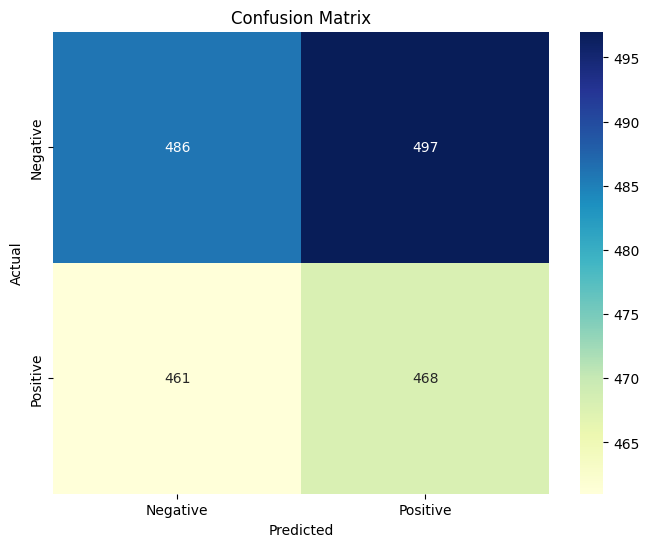

In [74]:
# !pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix # Import the confusion_matrix function

confusion_mtx = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='YlGnBu', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

### Challenges Faced During Sentiment Analysis for Urdu Language

Sentiment analysis for the Urdu language presented a unique set of challenges, mainly due to the lack of existing resources, language-specific complexities, and difficulties in adapting standard NLP techniques. Below is a summary of the key challenges faced during the project:

#### 1. Lack of Pre-built Stopwords for Urdu
One of the major challenges was the unavailability of reliable pre-built stopword lists for Urdu. Unlike English, where libraries such as `nltk` provide well-defined stopword lists, Urdu lacked comprehensive resources. This required manual creation of stopwords, which is time-consuming and error-prone, as identifying irrelevant but frequently used words in Urdu varies across different dialects and contexts.

#### 2. Cleaning the Data Was Not Easy
Data cleaning for Urdu posed several difficulties due to the script’s nature and complexity. Handling diacritical marks, punctuation, and mixed script (Urdu and English) text required special attention. Moreover, colloquial variations in Urdu spellings (e.g., different ways to write the same word) added further complexity in standardizing the data.

#### 3. Lemmatization Challenges
Urdu has a complex morphology, and lemmatization was particularly difficult. Urdu words can have multiple root forms, making it hard to reduce words to their base forms consistently. Unlike English, where tools like `spaCy` or `WordNet` offer robust lemmatizers, Urdu lacks efficient lemmatization libraries, causing difficulties in word standardization and affecting model performance.

#### 4. Poor Performance of Word2Vec
Training the **Word2Vec** model for Urdu didn’t yield satisfactory results. This was due to the small size of the available corpus, as well as the sparsity of data. Urdu does not have the extensive pre-trained word embeddings that are available for English, and training custom embeddings for Urdu requires a much larger and diverse dataset. As a result, the model failed to capture meaningful word relationships, which in turn affected downstream tasks such as sentiment classification.

#### 5. Logistic Regression Model Poor Accuracy
When experimenting with traditional machine learning models like **Logistic Regression**, the performance in terms of accuracy, precision, and recall was below expectations. The reasons for poor performance included the imbalance in the dataset (more neutral than positive/negative sentiment), sparse feature vectors, and the inefficiency of the TF-IDF features in capturing the nuances of Urdu text.

#### 6. Lack of High-Quality Datasets
Another major hurdle was the lack of publicly available, labeled datasets for Urdu sentiment analysis. English NLP benefits from large-scale datasets such as IMDB or Twitter sentiment data, whereas for Urdu, we had to rely on small, custom-curated datasets. This led to limitations in training the model and achieving good generalization.

#### 7. Tokenization Issues
Tokenization of Urdu text is more challenging compared to English because Urdu words are often joined together without spaces, and there are complex inflectional forms. Standard tokenization libraries do not work effectively on Urdu text, and custom tokenizers required significant development effort and manual tuning.

#### 8. Difficulty in Evaluating Model Performance
Evaluating the model was also problematic due to the scarcity of Urdu language resources. While there are well-established benchmark datasets for English sentiment analysis, Urdu lacks such benchmarks. This made it harder to compare our model’s performance against standard baselines or existing models.

#### 9. Lack of Pre-trained Models and Libraries for Urdu
There is a significant lack of pre-trained language models for Urdu. Resources like **BERT** and **GPT** are highly optimized for English and other major languages but are not directly usable for Urdu without significant customization. This restricted the ability to leverage transfer learning, which is a key advantage in modern NLP.

### Conclusion
# Developing sentiment analysis for the Urdu language faced multiple challenges, from the lack of stopword lists and poor lemmatization to issues with tokenization and inadequate dataset sizes. Additionally, the lack of pre-trained models and the underperformance of traditional techniques like Word2Vec and Logistic Regression made it difficult to achieve high accuracy. Despite these hurdles, these challenges highlighted the need for better tools, resources, and research in Urdu natural language processing. **bold text**